First 5 rows of the dataset:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  

Last 5 rows of the dataset:
         LB        AC        FM        UC   DL   DS   DP  ASTV  MSTV  \
2121  140.0  0.000000  0.961268  0.007426  0.0  0.0  0.0  79.0   0.2   
2122  140.0  0.000775  0.000000  0.006979  0.0  0.0  0.0  78.0   0.4   
2123  140.0  0.000980  0.000000  0.006863  0.0  0.0  

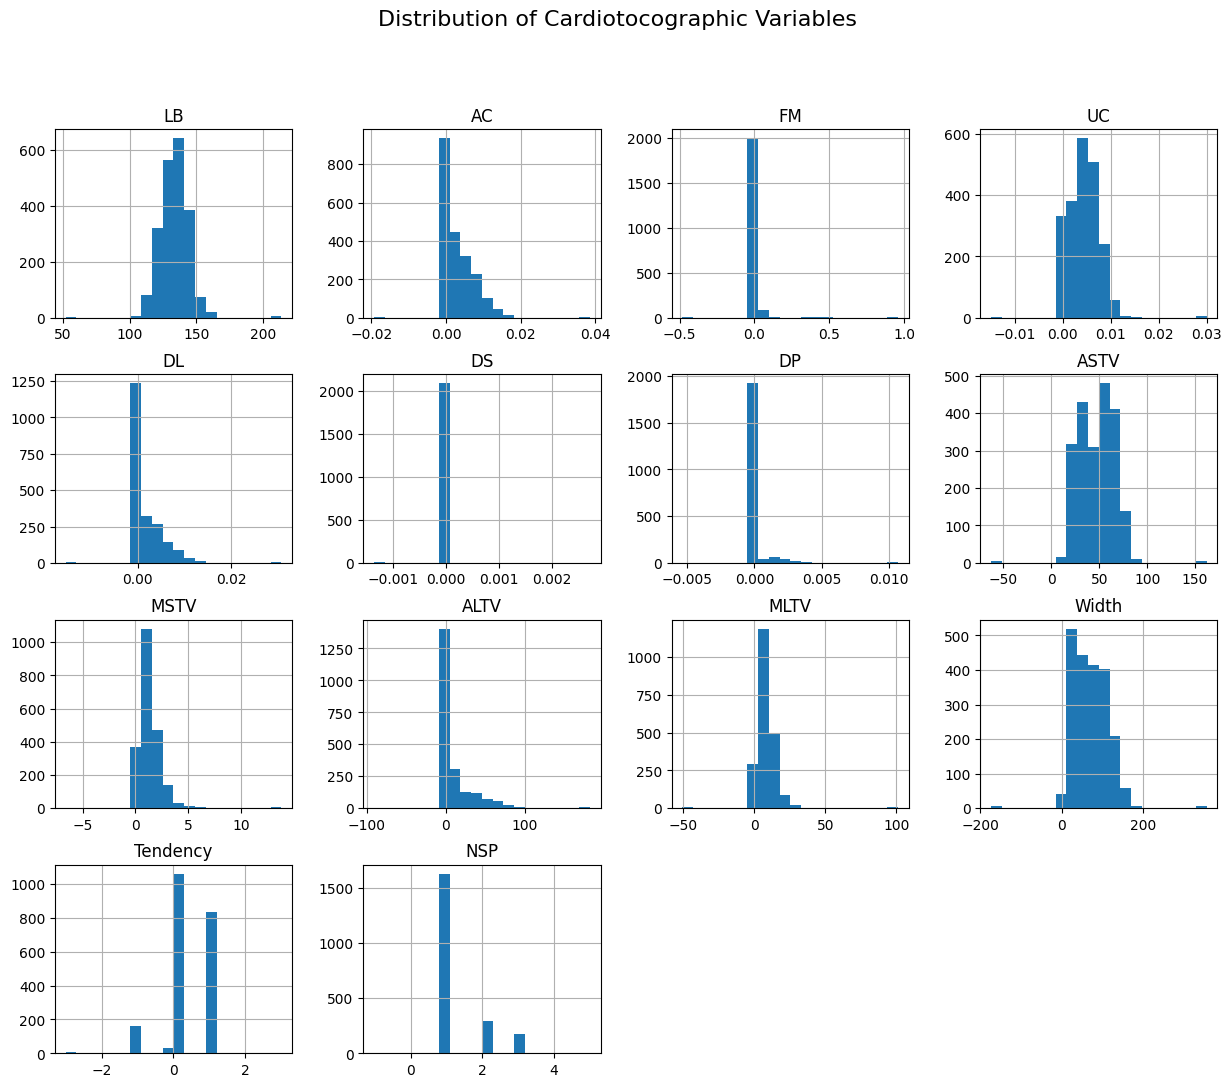

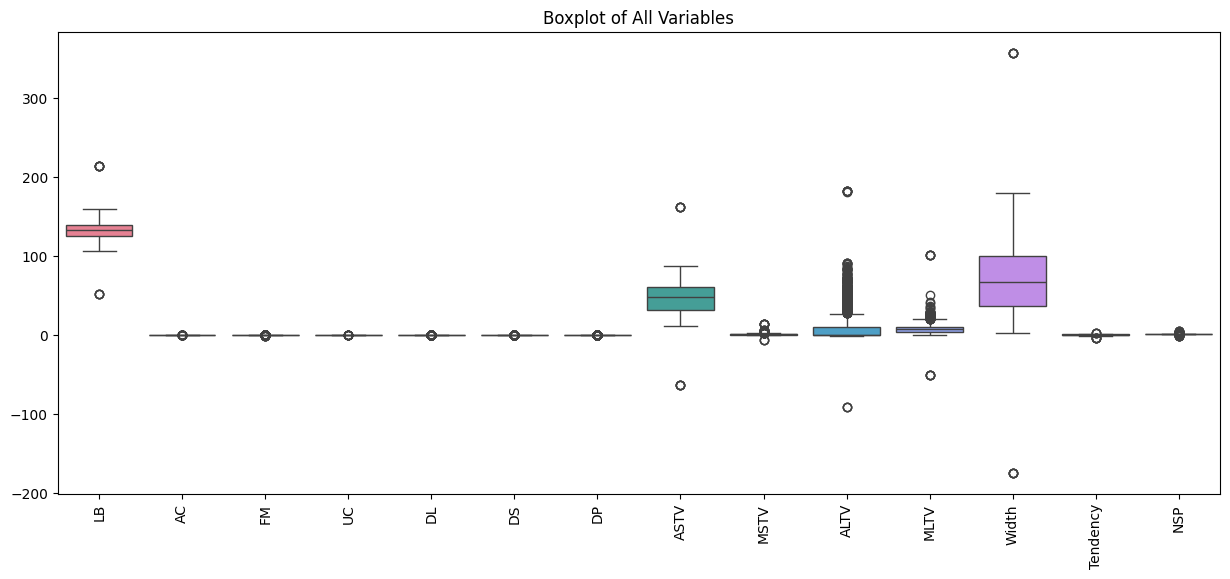

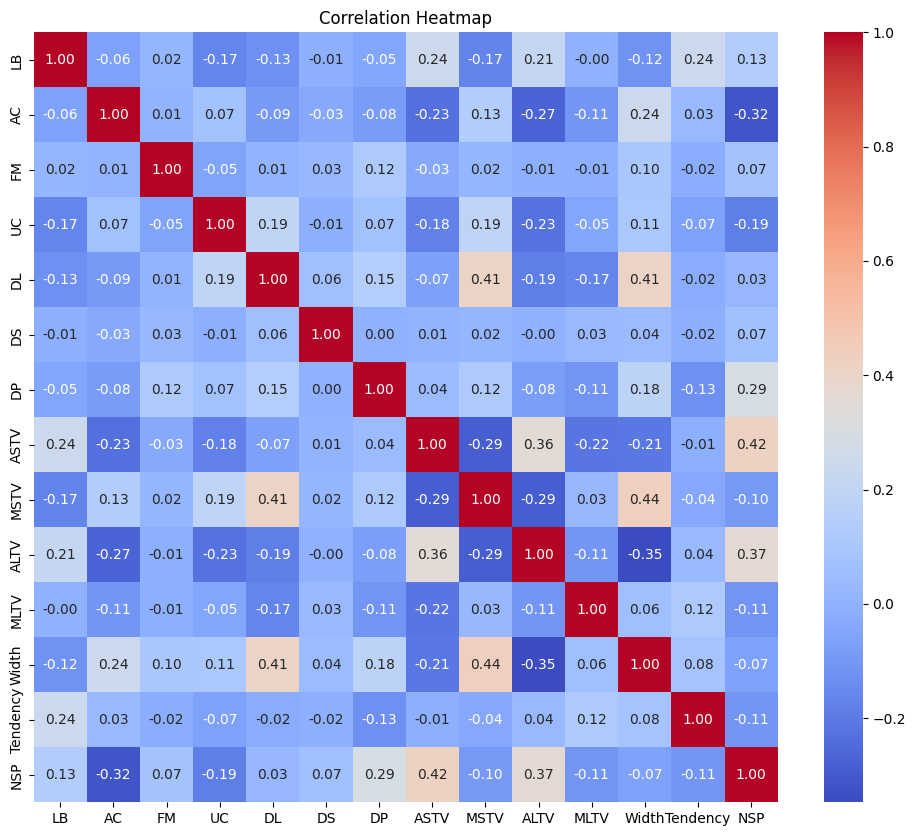

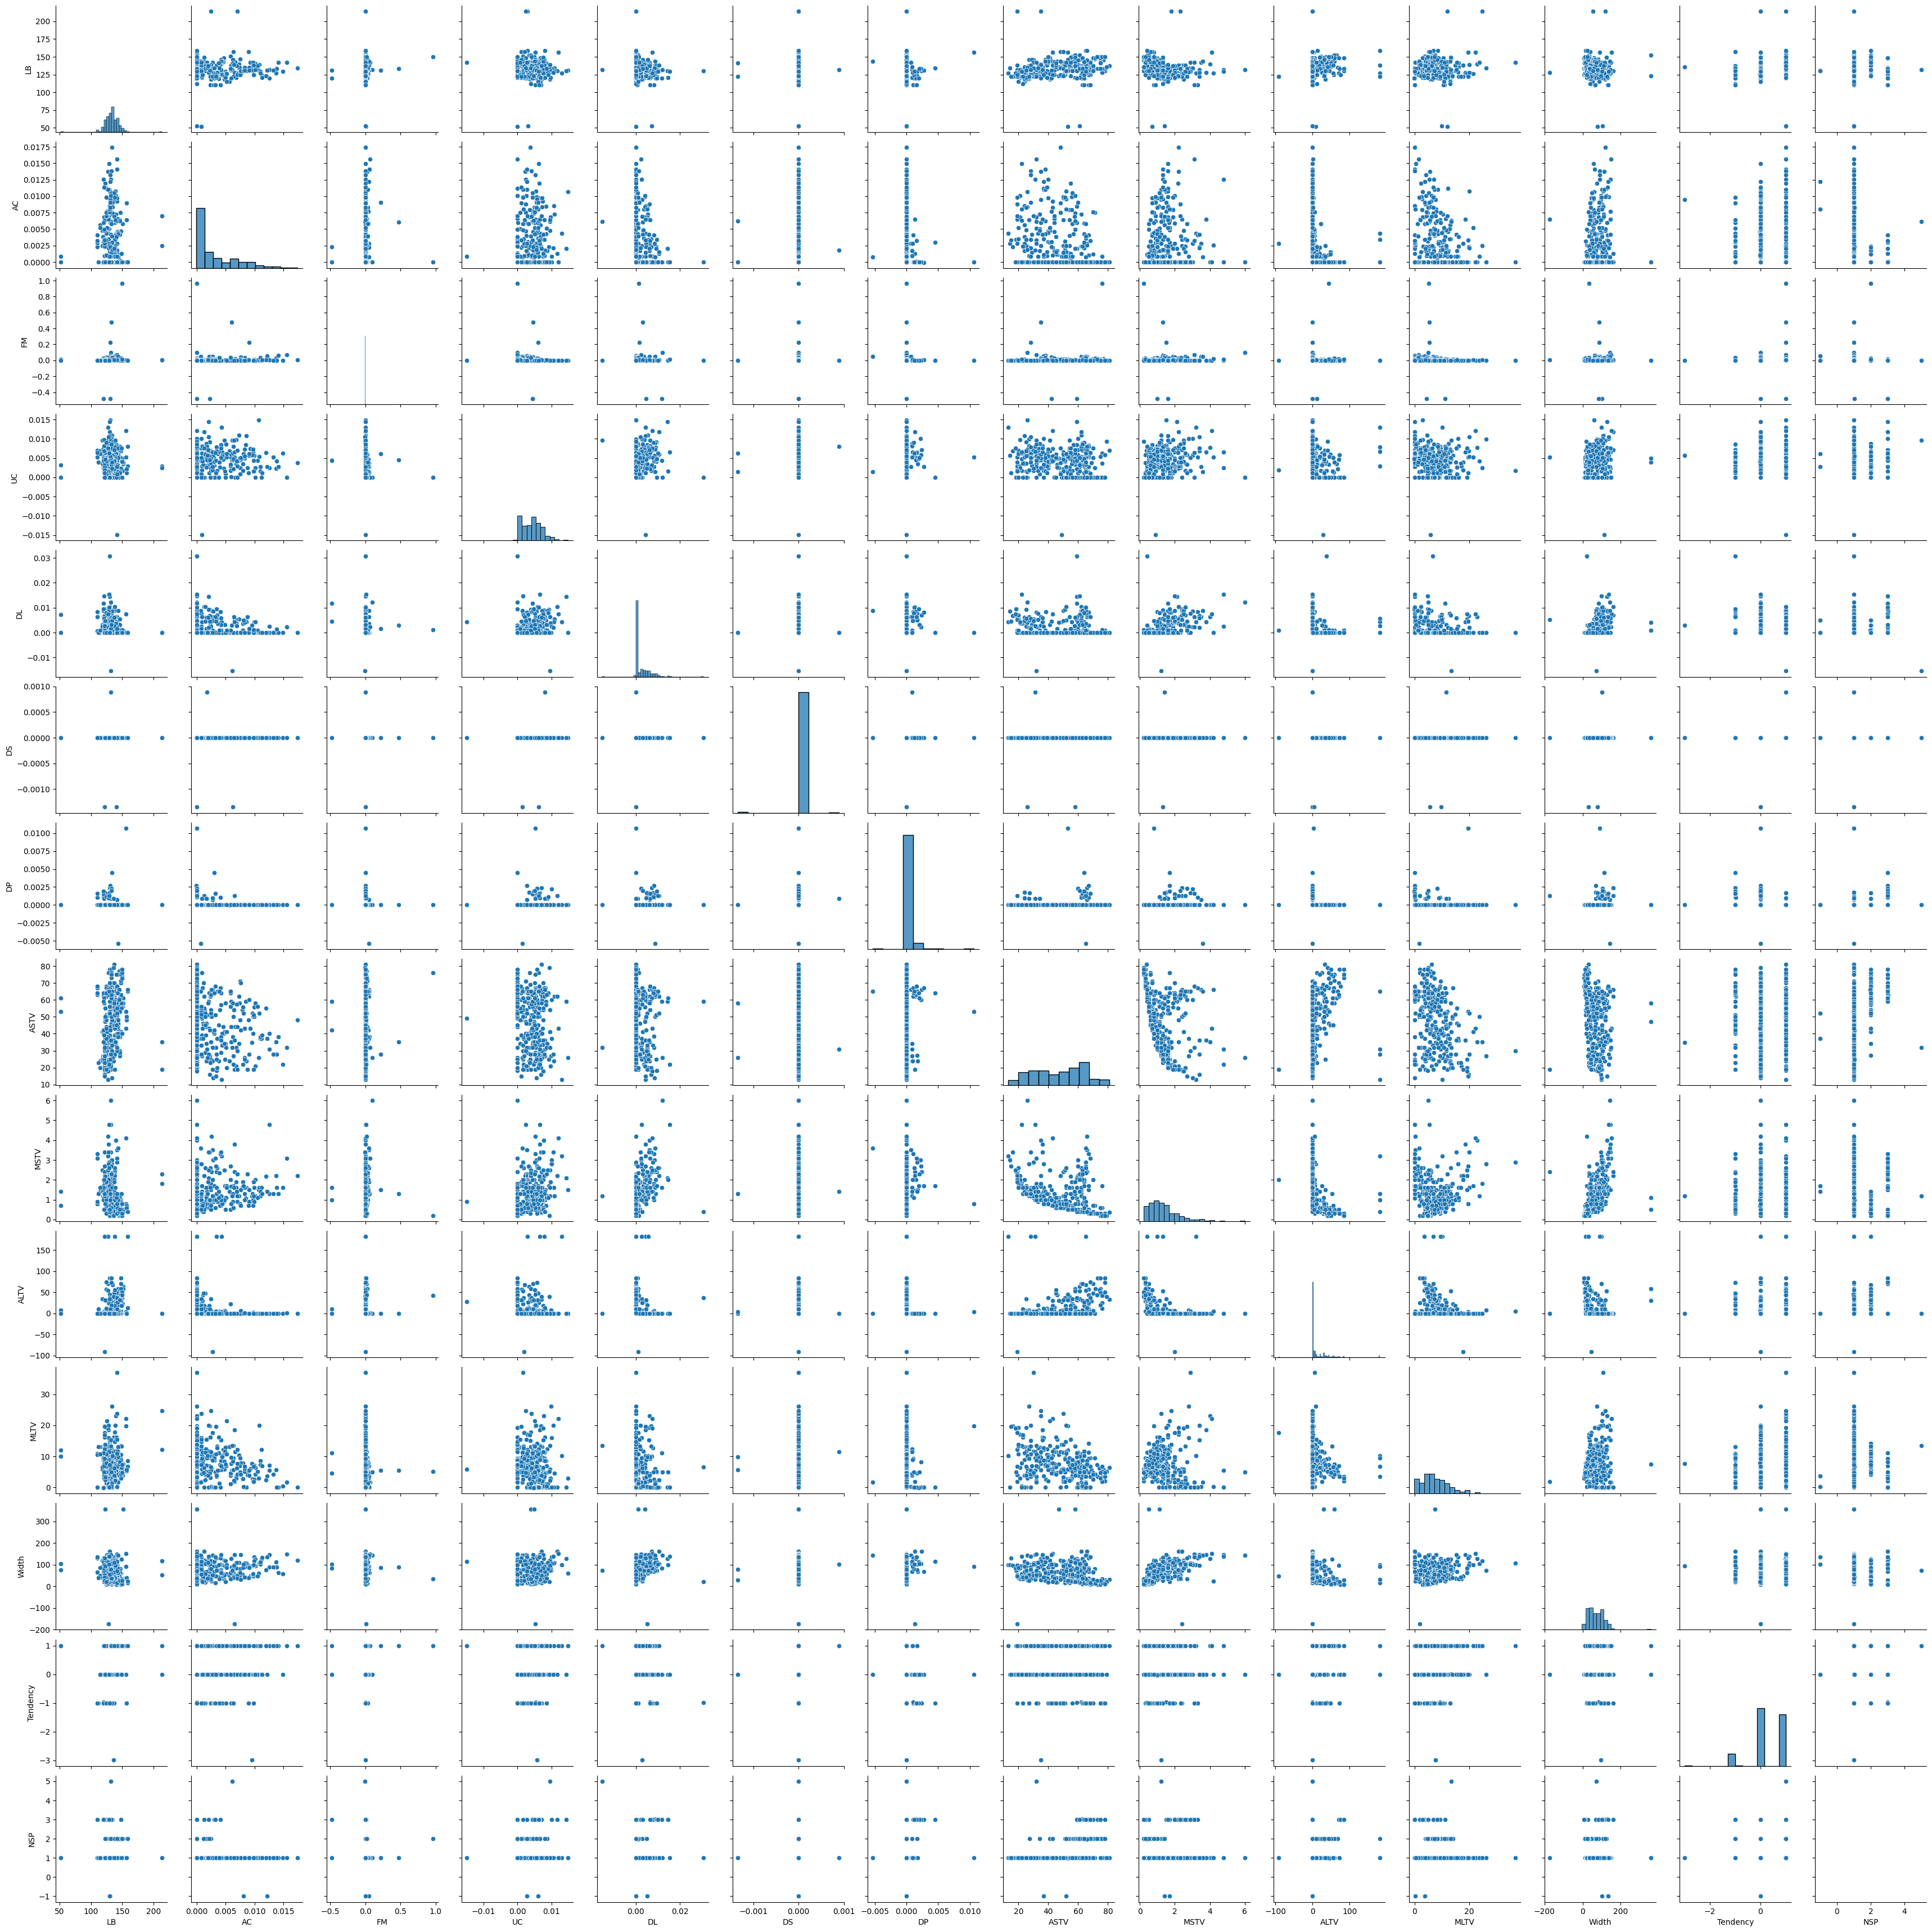

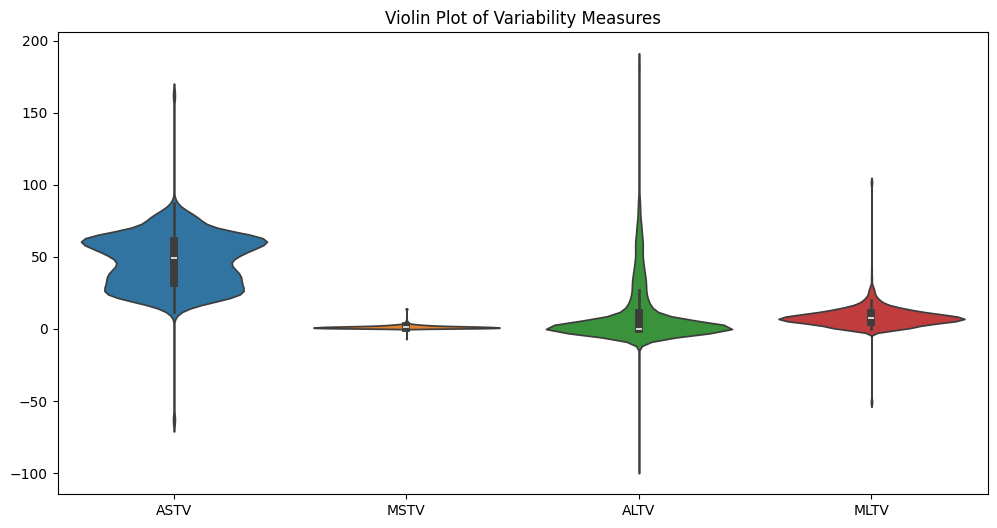


Key Insights:
- Baseline fetal heart rate (LB) is generally within a normal range.
- Short-term and long-term variability features show strong correlations.
- Accelerations (AC) are indicators of fetal well-being.
- Decelerations occur less frequently but are clinically significant.
- The dataset is clean and suitable for further predictive modeling.


In [1]:
# =========================================================
# Exploratory Data Analysis (EDA) - Cardiotocographic Dataset
# =========================================================

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

# ---------------------------------------------------------
# 2. Load Dataset
# ---------------------------------------------------------
df = pd.read_csv("C:\\Users\\Shreyas Mahale\\Downloads\\EDA1\\Cardiotocographic.csv")

print("First 5 rows of the dataset:")
print(df.head())
print("\nLast 5 rows of the dataset:")
print(df.tail())

# ---------------------------------------------------------
# 3. Basic Dataset Information
# ---------------------------------------------------------
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# ---------------------------------------------------------
# 4. Data Cleaning & Preparation
# ---------------------------------------------------------

# Check missing values
print("\nTotal Missing Values:")
print(df.isnull().sum())

# Remove duplicate rows if any
print("\nTotal number of Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

# ---------------------------------------------------------
# 5. Outlier Detection (IQR Method)
# ---------------------------------------------------------
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers per column:")
print(outliers)

# ---------------------------------------------------------
# 6. Statistical Summary
# ---------------------------------------------------------
print("\nStatistical Summary:")
print(df.describe())

summary = pd.DataFrame({
    "Mean": df.mean(),
    "Median": df.median(),
    "Standard Deviation": df.std(),
    "IQR": df.quantile(0.75) - df.quantile(0.25)
})

print("\nExtended Statistical Summary:")
print(summary)

# ---------------------------------------------------------
# 7. Data Visualization
# ---------------------------------------------------------

# Histograms
df.hist(bins=20, figsize=(15, 12))
plt.suptitle("Distribution of Cardiotocographic Variables", fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of All Variables")
plt.show()

# ---------------------------------------------------------
# 8. Correlation Analysis
# ---------------------------------------------------------
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------------------------------------
# 9. Advanced Visualizations
# ---------------------------------------------------------

# Pair Plot (sampled for performance)
sns.pairplot(df.sample(300, random_state=42))
plt.show()

# Violin Plot for Variability Features
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[["ASTV", "MSTV", "ALTV", "MLTV"]])
plt.title("Violin Plot of Variability Measures")
plt.show()

# ---------------------------------------------------------
# 10. Key Insights (Printed)
# ---------------------------------------------------------
print("\nKey Insights:")
print("- Baseline fetal heart rate (LB) is generally within a normal range.")
print("- Short-term and long-term variability features show strong correlations.")
print("- Accelerations (AC) are indicators of fetal well-being.")
print("- Decelerations occur less frequently but are clinically significant.")
print("- The dataset is clean and suitable for further predictive modeling.")